# Data Visualization
## Due Tuesday, April 26

In this lab, you will prepare statistical graphics for the MovieLens data set that you examined in the previous lab. Your graphics should be visually attractive and labeled, so please play around with color schemes and styles. You are welcome to use `ggplot`, `seaborn`, or other plotting packages we have not covered in class. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read in the Movielens data
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('/data/movielens/users.dat', sep='::', header=None,
                      names=unames, engine="python")

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('/data/movielens/ratings.dat', sep='::', header=None,
                        names=rnames, engine="python")

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('/data/movielens/movies.dat', sep='::', header=None,
                       names=mnames, engine="python")

## Question 1 (10 points)

Make a histogram of the distribution of average ratings by user. Make a separate histogram of the distribution of average ratings by movie. (It's up to you whether to put them in the same figure or not.) Comment on what you see. How are the two histograms similar and different?

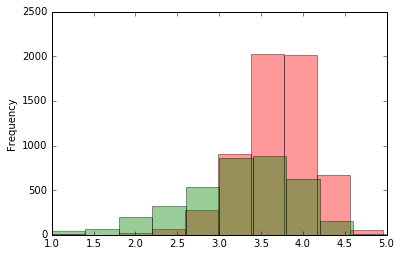

In [3]:
avg_user_rate = ratings.groupby('user_id')['rating'].mean()

avg_user_rate.plot.hist(color = 'red', alpha = .4)

avg_movie_rate = ratings.groupby('movie_id')['rating'].mean()

avg_movie_rate.plot.hist(color = 'green', alpha = .4)




Both histograms tend to be skewed left. We can see from the red histogram that users gave ratings mostly in the range of 3.5-4.0 while movie rarting are more normal shaped centering roughly aroung 3.5.

## Question 2 (20 points)

Make a scatterplot showing the relationship between a user's age and his/her average rating. The size of each point in the scatterplot should correspond to the number of ratings he/she submitted. Comment on what you see, including any outliers and the presence or absence of a relationship.

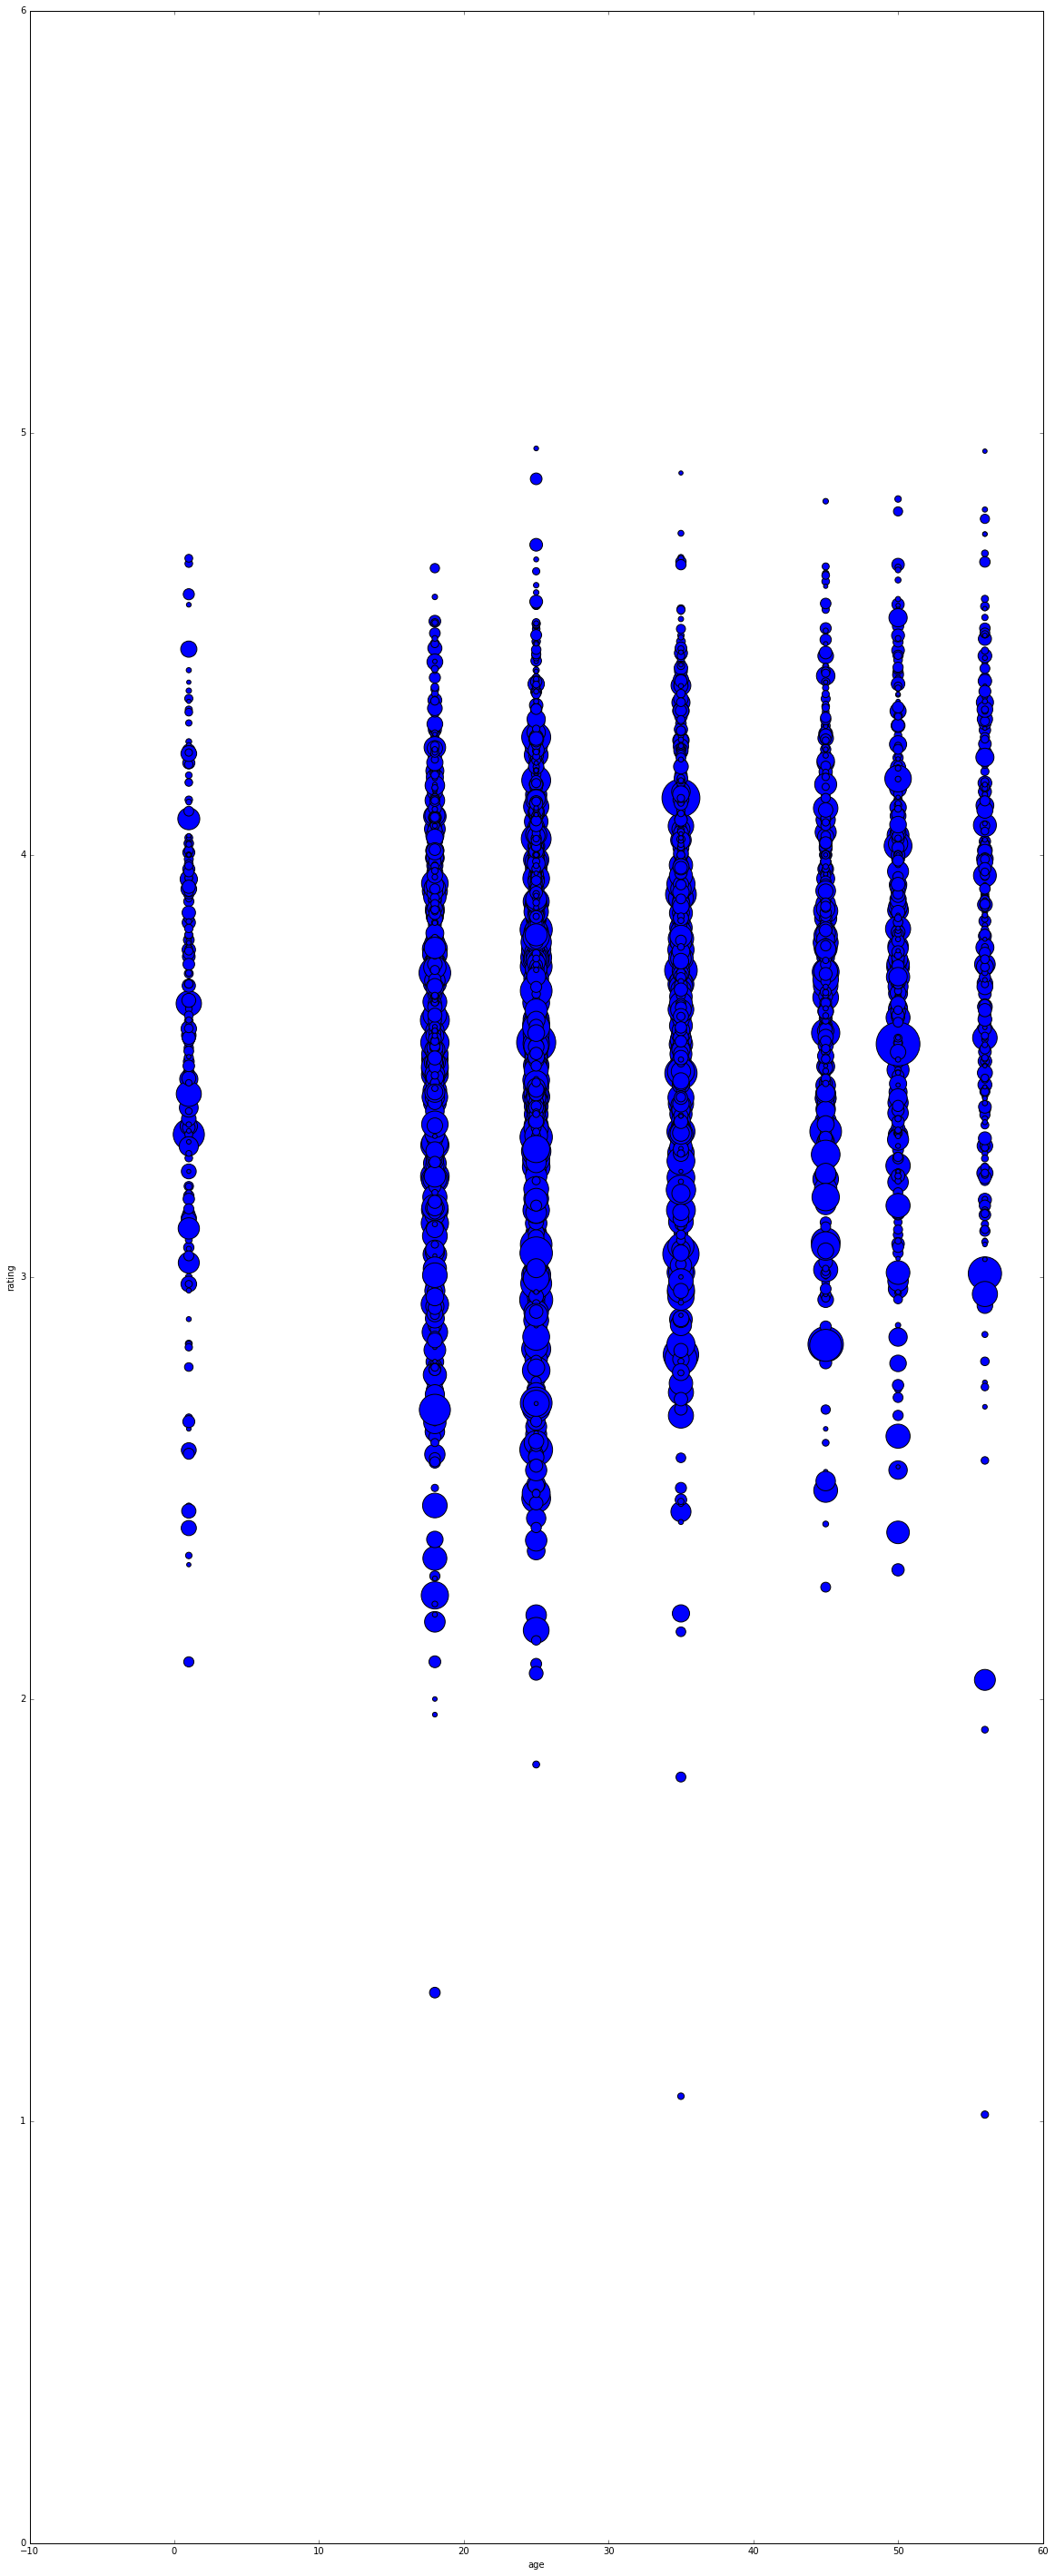

In [4]:
user_rating_merge = pd.merge(users, ratings, on="user_id", how="inner")

avg_age_ratings = user_rating_merge.groupby(["age", "user_id"]).mean().reset_index()

age_count = user_rating_merge.groupby(["age", "user_id"]).count().reset_index()

avg_age_ratings = avg_age_ratings[["age", "rating"]]

avg_age_ratings.plot.scatter("age", "rating", s=age_count["rating"], figsize=(20,50), alpha = 1)

As a age increases it appears that the mean average rating is centered around 3.5. This is indicated by the face that there is very little different to the centers of each blue cluster across age groups. There appear to be quite a few outliers, in particuliar, a user artounf age 58 has a average movie rating of around 1. This is largely due to the fact that this individual has so few ratings (his circle is small) and thus he may only of written reviews when he was compelled to do so by a very bad movie. 

## Question 3 (20 points)

Make a bar graph showing the average rating by genre. (You will need to do some data wrangling to get the data into the right form, since right now the "Genre" column lists all the genres a movie was in.) Don't forget error bars showing the 95% confidence intervals. Comment on what you see.

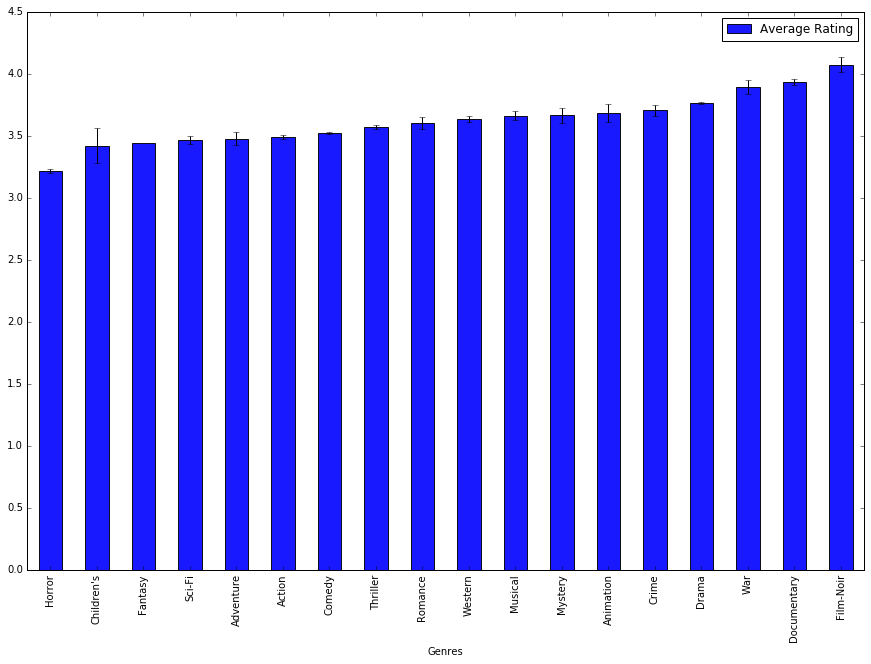

In [5]:
from scipy.stats import t

genres = movies['genres'].str.cat(sep = '|').split("|") ## farm all the genres from movies df.
genres = list(set(genres)) # put each unique genre in a list. 

movie_rating_merge = pd.merge(movies, ratings, on="movie_id", how="inner")

genre_ratings = movie_rating_merge.groupby("genres")["rating"]
avg_genre_ratings = genre_ratings.mean()

margin = t.ppf(.975, genre_ratings.count()) * (genre_ratings.std() / (genre_ratings.count() ** .5))

merge = pd.merge(movies, ratings, on= 'movie_id')

for Mtype in genres:
    merge[Mtype] = merge['genres'].str.contains(Mtype)

avg = list()
type = list()
df = pd.DataFrame()
for Mtype in genres:
    type.append(Mtype)
    num = merge[Mtype].sum() ## docs
    docs = merge[merge[Mtype] == True]
    avgrate = docs['rating'].sum() / num
    avg.append(avgrate)
df['Genres'] = type
df['Average Rating'] = avg
df = df.sort_values('Average Rating')
df.set_index('Genres').plot.bar(yerr = margin , figsize = (15,10), alpha = .9)



The results show that for alot of film Genres we cant conlcude that there is a significant difference between the average ratings. THis is illustrated by the overalpping of confidence intervals in the diagram. For instance, the 95% CI overlap for crime and dramas and thus we cannot conclude that there is a difference between the average ratings for those two groups. On, the other hand, we can see that no CI intersect with FIlm-Noir's CI and thus we can affirmitavely declare that FIlm -NOir is the highest average rated. 

## Question 4 (20 points)

Using the `timestamp` column, count up the number of ratings on each day and make a line plot showing this data. You will want to use Pandas' [time series functionality](http://pandas.pydata.org/pandas-docs/stable/timeseries.html) to manipulate this timestamp into more human-friendly datetime format.

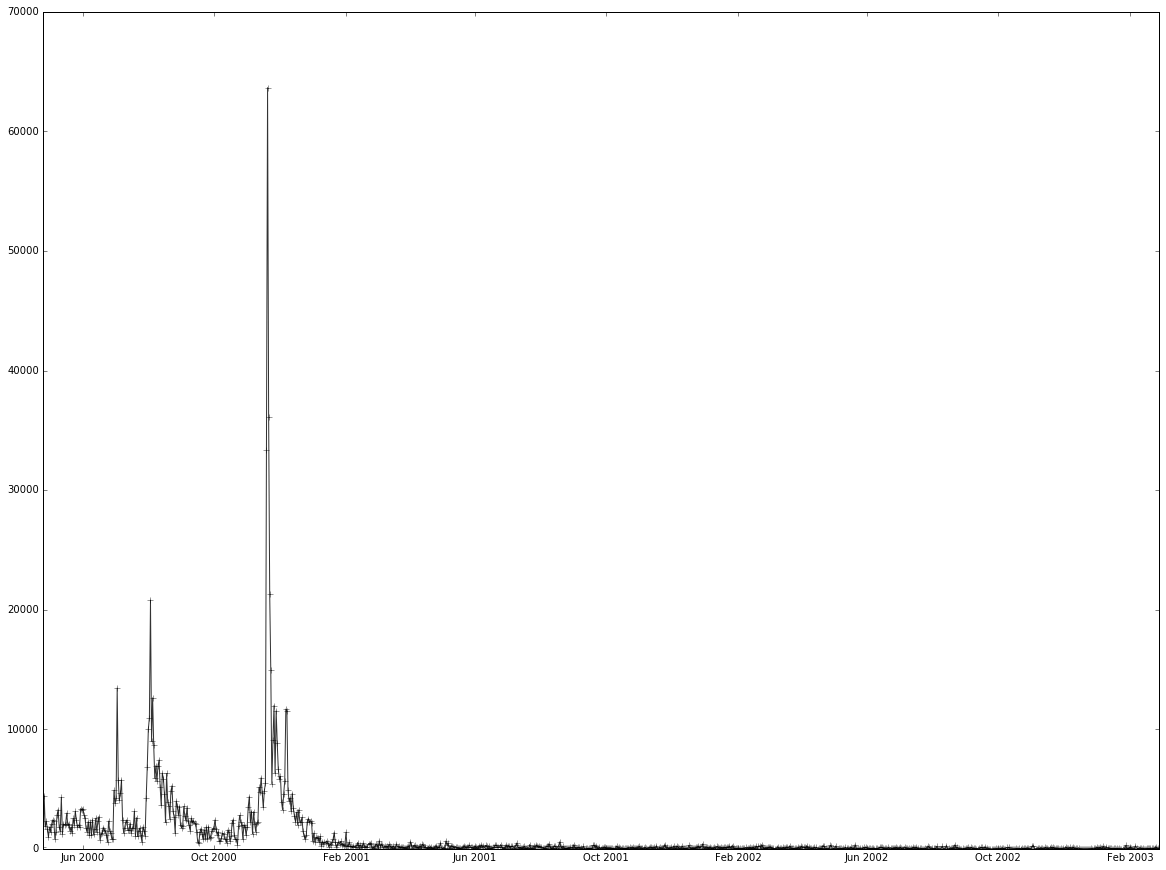

In [6]:
time_ratings = ratings

time_ratings["timestamp"] = pd.to_datetime(time_ratings["timestamp"], unit='s').apply(lambda x: x.date())

count_result = time_ratings.groupby("timestamp")["rating"].count()

x = count_result.index

y = count_result.values

plt.figure(figsize=(20,15))

plt.plot(x, y, "k-+", alpha=.8)

We can see huge spikes in the number of reviews per day towards the end of the year 2000 and following that there is a huge decline in ratings per day since the curve flattens out from feb 2001 onwards. 

## Question 5 (20 points)

Make an appropriate graphic that explains the relationship between occupation, gender, and average rating. (This question is deliberately open-ended, so there may be several acceptable answers. However, some answers are definitely wrong. Make sure you think carefully about the types of each of these variables.)

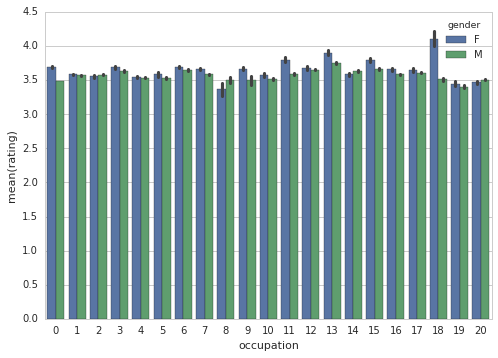

In [7]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

user_ratings_merge = pd.merge(users, ratings, on="user_id", how="inner")

sns.barplot(x = 'occupation', y = 'rating' , hue = 'gender', data = user_rating_merge)


OMG Seaborn is the best. LOL. SO the figure above shows uys within certain occupation there are huge disparities in how the genders rate movies. Looking at occupation 18, for instance, we can see that females have a average rating between 3.9 and 4.25 while males have an average rating of about 3.4 to 3.52,. HUGE difference. ALot of the occupations have the confidence intervals for males and females overlapping and thus we can conclude the average ratings within that occupation differ by gender ( soe occupations include 5, 8,12 etc.). 

## Submitting this Lab

Now, restart your kernel and re-run your entire notebook from beginning to end. Make sure there are no errors or bugs. When you have verified this, open the Terminal on JupyterHub and type 

`nbgrader submit Lab-04-19 --course dlsun`

to submit this lab.